# Fit a RL model on individual data

In [1]:
import rlssm
import pandas as pd
import os

## Import individual data

In [2]:
# import some example data:
data = rlssm.load_example_dataset(hierarchical_levels = 1)

data.head()

participant  block_label  trial_block  f_cor  f_inc  cor_option  \
0           20            1            1     46     46           4   
1           20            1            2     60     33           4   
2           20            1            3     32     44           2   
3           20            1            4     56     40           4   
4           20            1            5     34     32           2   

   inc_option  times_seen        rt  accuracy  
0           2           1  2.574407         1  
1           2           2  1.952774         1  
2           1           2  2.074999         0  
3           2           3  2.320916         0  
4           1           3  1.471107         1

## Initialize the model

In [3]:
# you can "turn on and off" different mechanisms:
model = rlssm.RLModel_2A(hierarchical_levels = 1,
                         increasing_sensitivity = False,
                         separate_learning_rates = True)

Using cached StanModel


In [4]:
model.priors

{'sensitivity_priors': {'mu': 1, 'sd': 50},
 'alpha_pos_priors': {'mu': 0, 'sd': 1},
 'alpha_neg_priors': {'mu': 0, 'sd': 1}}

## Fit

In [5]:
# sampling parameters
n_iter = 2000
n_chains = 2
n_thin = 1

# learning parameters
K = 4 # n options in a learning block (participants see 2 at a time)
initial_value_learning = 27.5 # intitial learning value (Q0)

In [6]:
model_fit = model.fit(
    data, 
    K, 
    initial_value_learning,
    sensitivity_priors={'mu': 0, 'sd': 5},
    thin = n_thin,
    iter = n_iter,
    chains = n_chains,
    verbose = False)

Fitting the model using the priors:
sensitivity_priors {'mu': 0, 'sd': 5}
alpha_pos_priors {'mu': 0, 'sd': 1}
alpha_neg_priors {'mu': 0, 'sd': 1}


Checks MCMC diagnostics:
n_eff / iter for parameter log_p_t[1] is 0.0005136779702589292!
E-BFMI below 0.2 indicates you may need to reparameterize your model
n_eff / iter for parameter log_p_t[2] is 0.0005090424204222284!
E-BFMI below 0.2 indicates you may need to reparameterize your model
n_eff / iter for parameter log_p_t[81] is 0.0006137657752379577!
E-BFMI below 0.2 indicates you may need to reparameterize your model
n_eff / iter for parameter log_p_t[161] is 0.000616751650396009!
E-BFMI below 0.2 indicates you may need to reparameterize your model
n_eff / iter for parameter log_lik[1] is 0.0005161261210126754!
E-BFMI below 0.2 indicates you may need to reparameterize your model
n_eff / iter for parameter log_lik[2] is 0.0005103493063252117!
E-BFMI below 0.2 indicates you may need to reparameterize your model
n_eff / iter for parameter log_lik[81] is 0.0009513954236082592!
E-BFMI below 0.2 indicates you may need to reparameterize your model
n_eff / iter below 0.001 indicates that t

## get Rhat

In [7]:
model_fit.rhat

rhat     variable
0  0.999890    alpha_pos
1  1.000694    alpha_neg
2  1.000057  sensitivity

## get wAIC

In [8]:
model_fit.waic

{'lppd': -76.0013341137295,
 'p_waic': 2.584147075766782,
 'waic': 157.17096237899256,
 'waic_se': 15.860333370240344}

## Posteriors

In [9]:
model_fit.samples.describe()

chain         draw  transf_alpha_pos  transf_alpha_neg  \
count  2000.000000  2000.000000       2000.000000       2000.000000   
mean      0.500000   499.500000          0.114611          0.362081   
std       0.500125   288.747186          0.063520          0.180011   
min       0.000000     0.000000          0.020200          0.010799   
25%       0.000000   249.750000          0.070945          0.230730   
50%       0.500000   499.500000          0.097523          0.329723   
75%       1.000000   749.250000          0.141440          0.449876   
max       1.000000   999.000000          0.567216          0.995145   

       transf_sensitivity  
count         2000.000000  
mean             0.345694  
std              0.057914  
min              0.187258  
25%              0.306195  
50%              0.339720  
75%              0.376828  
max              0.789082

In [10]:
import seaborn as sns
sns.set(context = "talk", 
        style = "white", 
        palette = "husl",
        rc={'figure.figsize':(15, 8)})

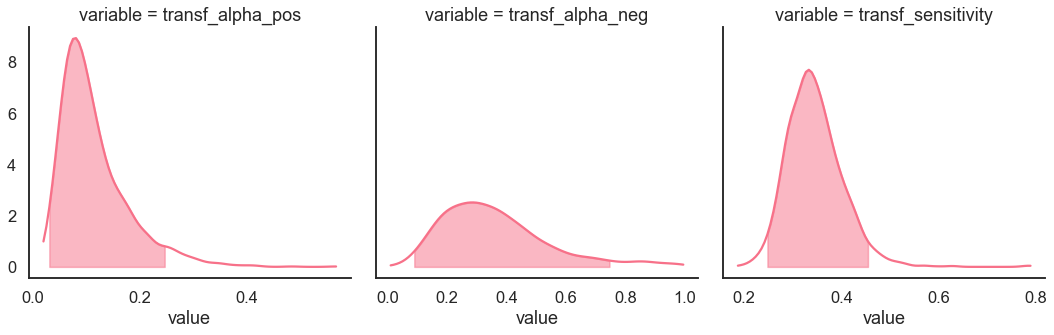

In [11]:
model_fit.plot_posteriors(height=5, show_intervals="HDI", alpha_intervals=.05);

## Posterior predictives

### Ungrouped

In [12]:
pp = model_fit.get_posterior_predictives_df(n_posterior_predictives=1000)
pp

variable accuracy                                      ...                  \
trial         1   2   3   4   5   6   7   8   9   10   ... 231 232 233 234   
sample                                                 ...                   
1               0   1   0   1   1   0   1   1   0   1  ...   1   1   1   1   
2               1   1   0   1   1   1   1   1   1   1  ...   0   1   1   1   
3               1   1   0   1   1   1   1   0   0   1  ...   0   0   1   0   
4               0   0   1   1   0   1   0   1   0   1  ...   0   1   1   1   
5               0   1   1   1   1   1   1   1   0   1  ...   0   0   1   1   
...           ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..   
996             1   1   1   1   1   0   1   0   1   1  ...   1   1   1   1   
997             1   0   1   1   1   0   1   1   0   0  ...   1   1   1   0   
998             0   1   1   1   1   1   0   0   0   1  ...   0   0   1   1   
999             1   1   1   1   1   1   1   0   0   0  ...   1   0   1   1   
1000            0   0   1   0   1   1   1   1   0   1  ...   0   1   1   1   

variable                          
trial    235 236 237 238 239 240  
sample                            
1          1   1   1   0   1   1  
2          1   1   1   0   1   1  
3          1   0   1   1   0   1  
4          1   1   1   1   1   1  
5          1   1   1   1   1   1  
...       ..  ..  ..  ..  ..  ..  
996        1   0   0   0   0   1  
997        1   1   1   1   1   1  
998        1   0   1   1   1   1  
999        1   0   1   1   0   1  
1000       1   0   1   1   1   1  

[1000 rows x 240 columns]

In [13]:
pp_summary = model_fit.get_posterior_predictives_summary(n_posterior_predictives=1000)
pp_summary

mean_accuracy
sample               
1            0.804167
2            0.804167
3            0.800000
4            0.883333
5            0.825000
...               ...
996          0.833333
997          0.908333
998          0.887500
999          0.845833
1000         0.900000

[1000 rows x 1 columns]

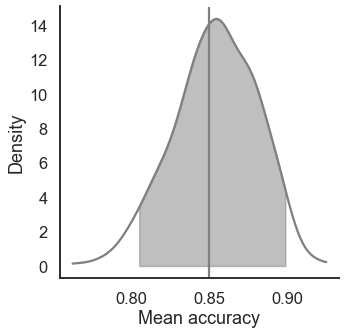

In [14]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

model_fit.plot_mean_posterior_predictives(n_posterior_predictives=500, ax=ax, show_intervals='HDI')

ax.set_ylabel('Density')
ax.set_xlabel('Mean accuracy')

sns.despine()

### Grouped

In [15]:
import numpy as np

In [16]:
# Define new grouping variables, in this case, for the different choice pairs, but any grouping var can do
data['choice_pair'] = 'AB'
data.loc[(data.cor_option == 3) & (data.inc_option == 1), 'choice_pair'] = 'AC'
data.loc[(data.cor_option == 4) & (data.inc_option == 2), 'choice_pair'] = 'BD'
data.loc[(data.cor_option == 4) & (data.inc_option == 3), 'choice_pair'] = 'CD'

data['block_bins'] = pd.cut(data.trial_block, 8, labels=np.arange(1, 9))

In [17]:
model_fit.get_grouped_posterior_predictives_summary(grouping_vars=['block_label', 'block_bins', 'choice_pair'], 
                                                    n_posterior_predictives=500)

mean_accuracy
block_label block_bins choice_pair sample               
1           1          AB          1            0.800000
                                   2            0.200000
                                   3            0.600000
                                   4            0.800000
                                   5            0.800000
...                                                  ...
3           8          CD          496          1.000000
                                   497          0.666667
                                   498          0.333333
                                   499          0.333333
                                   500          0.333333

[46000 rows x 1 columns]

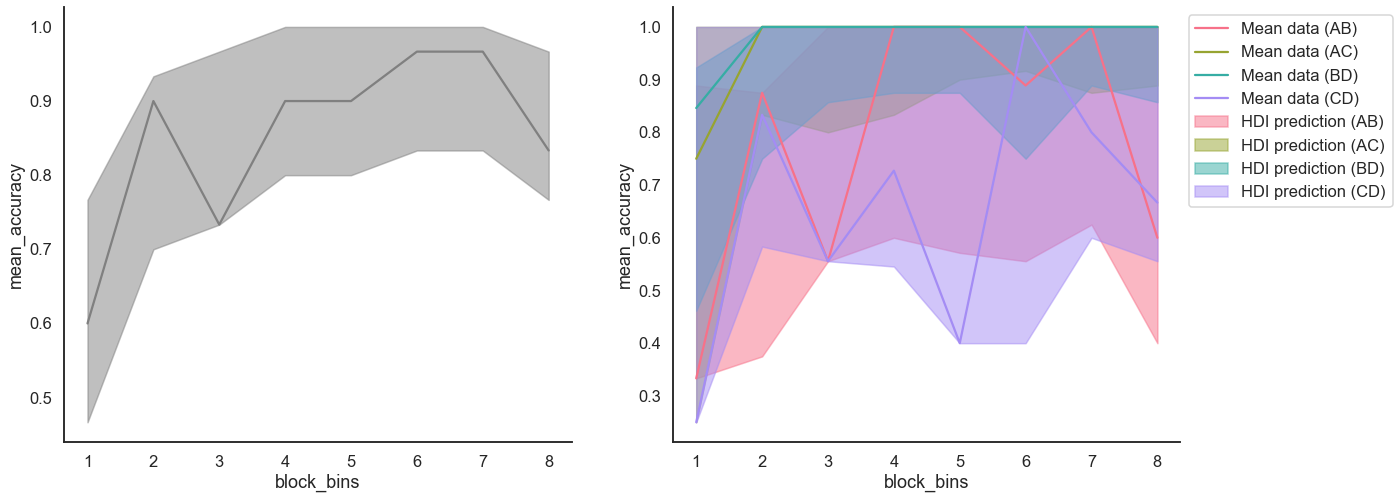

In [18]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(20,8))

model_fit.plot_mean_grouped_posterior_predictives(grouping_vars=['block_bins'], n_posterior_predictives=500, ax=axes[0])

model_fit.plot_mean_grouped_posterior_predictives(grouping_vars=['block_bins', 'choice_pair'], n_posterior_predictives=500, ax=axes[1])

sns.despine()